<a href="https://colab.research.google.com/github/hyeonniii/NLP/blob/main/%EA%B5%90%EC%9C%A1/0817%EA%B5%90%EC%9C%A1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mnist 데이터를 활용한 Random Forest 예제

### Initialization

In [5]:
""" 
필요한 함수들을 불러오기: 
keras & tensorflow - mnist 예제 데이터를 위한 라이브러리 (대체 가능), 
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기,
sklearn - Random Forest, partial dependencd, 추가 데이터
등...
"""

from sklearn.datasets import fetch_openml
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset 1
from sklearn.datasets import load_boston # calling dataset 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
# data format 확인하기
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

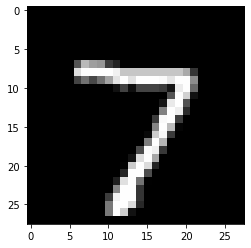

In [4]:
# data 그림으로 확인하기 
plt.figure()
plt.imshow(x_test[0], cmap='gray')

In [6]:
# 계산의 용이성을 위해 데이터의 형태 바꾸기 (28개의 행 -> 1행)
# 28 X 28 매트릭스 --> 1 X 784 매트릭스로 변환 (부록 B 참조)
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [7]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


### Run Random Forest

In [8]:
rf = RandomForestClassifier(n_jobs=-1) # use all CPU cores
rf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1)

In [9]:
# 모델의 교차검증 (다른 방법)
cross_val_score(rf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.89458333, 0.88766667, 0.88575   , 0.88525   , 0.89691667])

In [10]:
# 훈련된 random forest 모델을 이용하여 테스트 하기
prediction = rf.predict(X_test)
result = (prediction == Y_test).mean()
print('Test accuracy:', result)

Test accuracy: 0.98964


### Plot Samples

[1 4 7 0 7 3 5 3 1]


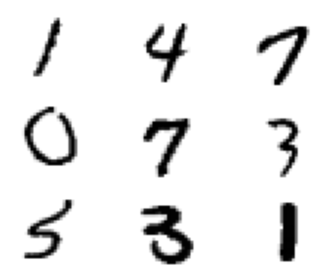

In [11]:
fig = plt.figure()
random_pick = np.random.randint(low=0, high=10000, size=9)
print(y_test[random_pick])

for i in range(9):
    idx = random_pick[i]
    img = np.reshape(X_test[idx], (28, 28))
    plot = fig.add_subplot(3, 3, i+1)
    plot.imshow(img, cmap = 'binary')
    plot.axis('off')
    plt.tight_layout()

In [12]:
# Sample data (보스턴 주택 데이터)를 읽은 뒤 데이터 분할
boston_data = load_boston() # Boston data 읽기
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
Y = pd.Series(boston_data.target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 데이터 확인하기
"""
CRIM: Crime rate by town. (FBI (1970))
ZN: Proportion of a town’s residential land zoned for lots greater than 25,000 square feet. (Metropolitan Area Planning Commission (1972))
INDUS: Proportion nonretail business acres per town. (Vogt, Ivers, and Associates)
CHAS: Charles River dummy: = 1 if tract bounds the Charles River; = 0 otherwise. (1970 US Census Tract maps)

Air pollution ---
NOX: Nitrogen oxide concentrations in pphm. (TASSIM)

Structural ---
RM: average number of rooms in owner units. (1970 US Census)
AGE: proportion of owner units built prior to 1940. (1970 US Census)

Accessibility ---
DIS: Weighted distances to five employment centers in the Boston region. (Schnare)
RAD: Index of accessibility to radial highways. (MIT Boston Project)

TAX: Full value property tax rate ($/$10,000). (Massachusetts Tax-payers Foundation (1970))
PTRATIO: Pupil-teacher ratio by town school district. (Mass. Dept. of Education (1971–1972))

B: Black proportion of population. (1970 US Census)
LSTAT: Proportion of population that is lower status = 1/2 * (proportion of adults without some high school education and proportion of male workers classified as laborers). (1970 US Census)


Target - Housing prices

source: https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8
"""

X

In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [15]:
X.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [16]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
new_X = min_max_scaler.fit_transform(X)
print(new_X)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


In [20]:
# 데이터 형식 train과 test로 구분하여 불러온 뒤 각각 target 값을 분리하여 저장

"""
Dataset 구성도
---------------------------------
|    X_train     |    Y_train   |     <-   훈련용
---------------------------------
|    X_test      |    Y_test    |     <-   테스트용
---------------------------------
"""

X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y.to_numpy(), test_size = 0.2, random_state=42)

In [21]:
# RandomForestClassifier 는 실수(float)에 잘 작동되지 않아서 RandomForestRegressor를 이용
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr.fit(X_train, Y_train)

Y_predict_train = regr.predict(X_train)
Y_predict_test = regr.predict(X_test)

mse_train = mean_squared_error(Y_train, Y_predict_train)
mse_test = mean_squared_error(Y_test, Y_predict_test)
print(mse_train)
print(mse_test)

5.752611398082617
8.922334171930796


Text(0.5, 0, 'Random Forest Feature Importance')

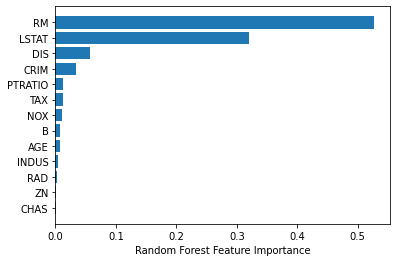

In [22]:
# 모델의 기본적인 중요도 확인
default_importance = regr.feature_importances_

sorted_idx = regr.feature_importances_.argsort()
plt.barh(boston_data.feature_names[sorted_idx], regr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

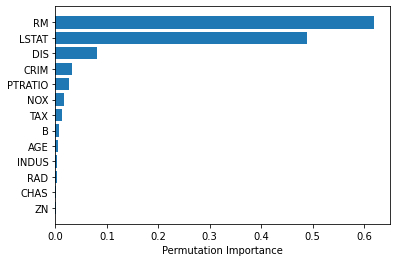

In [23]:
# 순서를 섞어서 (permutation) 중요도 다시 확인
perm_importance = permutation_importance(regr, X_train, Y_train)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston_data.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [33]:
X_train_reduced = pd.DataFrame(X_train, columns = boston_data.feature_names)
X_test_reduced = pd.DataFrame(X_test, columns = boston_data.feature_names)
X_train_reduced = X_train_reduced.loc[:,['RM','DIS','LSTAT','CRIM']]
X_test_reduced = X_test_reduced.loc[:,['RM','DIS','LSTAT','CRIM']]

regr_sel = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr_sel.fit(X_train_reduced, Y_train)

perm_feature_importance = permutation_importance(regr_sel, X_train_reduced, Y_train)

Y_predict_train = regr_sel.predict(X_train_reduced)
Y_predict_test = regr_sel.predict(X_test_reduced)

mse_train = mean_squared_error(Y_train, Y_predict_train)
mse_test = mean_squared_error(Y_test, Y_predict_test)
print(mse_train)
print(mse_test)

print(regr_sel.score(X_train_reduced,Y_train))
print(regr_sel.score(X_test_reduced,Y_test))

6.749587851963644
10.867136337007107
0.9223054749306021
0.8518126862042658


Text(0.5, 0, 'Permutation Importance for Reduced Model')

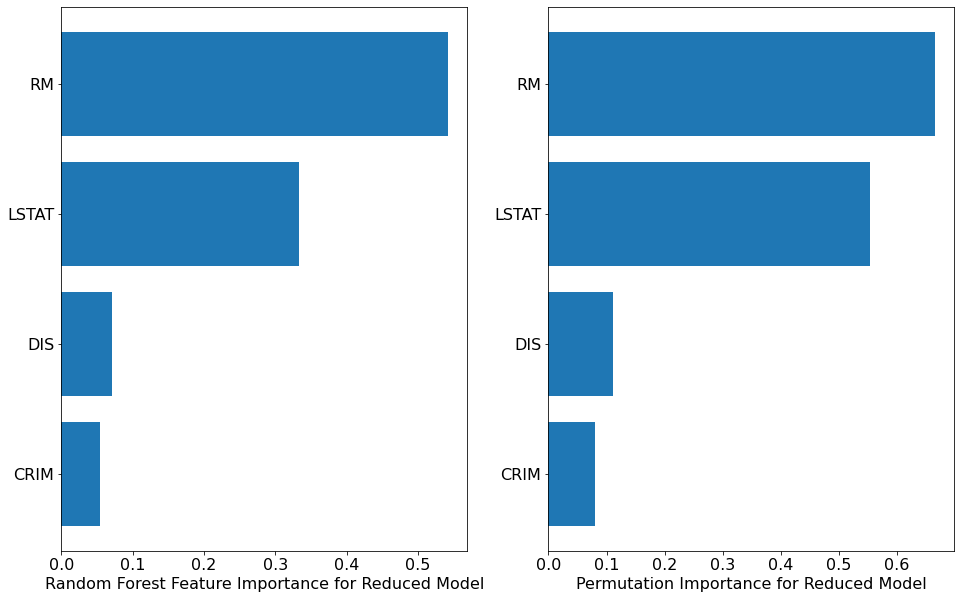

In [34]:
# 모델의 기본적인 중요도 확인
selected_var_importance = regr_sel.feature_importances_
# 순서를 섞어서 (permutation) 중요도 다시 확인
perm_importance_sel = permutation_importance(regr_sel, X_train_reduced, Y_train)

plt.figure(figsize = (16, 10))
ax = plt.subplot(1,2,1)

sorted_idx = regr_sel.feature_importances_.argsort()
plt.barh(X_train_reduced.columns[sorted_idx], regr_sel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance for Reduced Model")

ax = plt.subplot(1,2,2)
sorted_idx = perm_importance_sel.importances_mean.argsort()
plt.barh(X_train_reduced.columns[sorted_idx], perm_importance_sel.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance for Reduced Model")

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_partial_dependence.py:513: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  FutureWarning,


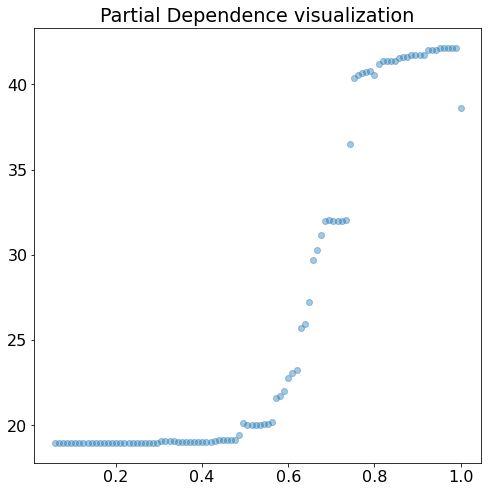

In [35]:
# Sklearn 모듈을 이용한 변수별 민감도 만들기
# 수치값 가지고 오기
PDs, grid = partial_dependence(regr_sel, X_train_reduced, features = ['RM'], percentiles = [0,1])

#PDs 와 grid 값 시각화
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='Partial Dependence visualization' )
# Create the scatter
scatter = ax.scatter(x=grid, y=PDs, alpha=0.4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


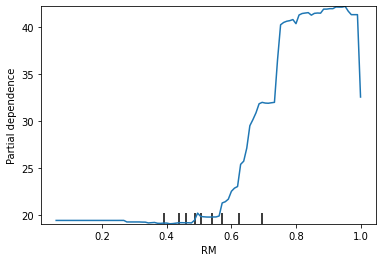

In [27]:
# Sklearn 모듈을 이용한 변수별 민감도 시각화
plot_partial_dependence(regr_sel, X_train_reduced, features = ['RM'], percentiles = [0,1]);

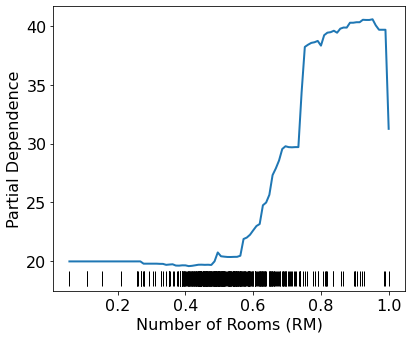

In [28]:
# 추가 함수생성을 이용한 시각화 (Rug plot을 고도화하여 데이터 분포를 함께 표현)
def get_PDPvalues(col_name, data, model, grid_resolution = 100):
    Xnew = data.copy()
    sequence = np.linspace(np.min(data[col_name]), np.max(data[col_name]), grid_resolution)
    Y_pdp = []
    for each in sequence:
        Xnew[col_name] = each
        Y_temp = model.predict(Xnew)
        Y_pdp.append(np.mean(Y_temp))
    return pd.DataFrame({col_name: sequence, 'PDs': Y_pdp})

def plot_PDP(col_name, data, model):
    df = get_PDPvalues(col_name, data, model)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (6,5)
    fig, ax = plt.subplots()
    ax.plot(data[col_name], np.zeros(data[col_name].shape)+min(df['PDs'])-1, 'k|', ms=15)  # rug plot
    ax.plot(df[col_name], df['PDs'], lw = 2)
    ax.set_ylabel('Partial Dependence')
    return ax

# RM 변수 시각화
ax = plot_PDP('RM', X_train_reduced, regr_sel)
ax.set_xlabel('Number of Rooms (RM)')
plt.tight_layout();

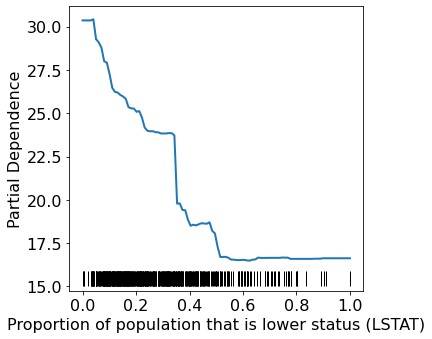

In [29]:
# LSTAT 변수 시각화
ax = plot_PDP('LSTAT', X_train_reduced, regr_sel)
ax.set_xlabel('Proportion of population that is lower status (LSTAT)')
plt.tight_layout();

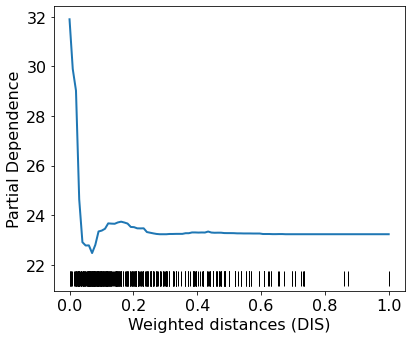

In [30]:
# DIS 변수 시각화
ax = plot_PDP('DIS', X_train_reduced, regr_sel)
ax.set_xlabel('Weighted distances (DIS)')
plt.tight_layout();

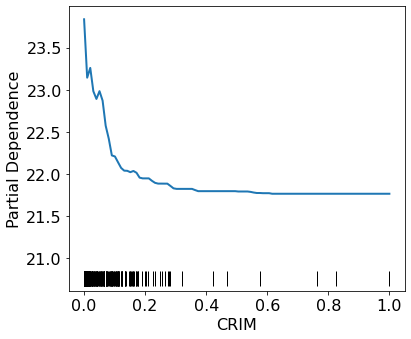

In [36]:
# CRIM 변수 시각화
ax = plot_PDP('CRIM', X_train_reduced, regr_sel)
ax.set_xlabel('CRIM')
plt.tight_layout();